# Project: European Soccer Database Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Welcome to Soccer Data Analysis Project, in this project, we will analyze European Soccer Database (made by Hugo Mathien). This soccer database comes from Kaggle and is well suited for data analysis and machine learning. It contains data for soccer matches, players, and teams from several European countries from 2008 to 2016.

>### Data Analysis is performed to answer the following questions:
(1) What teams improved the most over the time period? \
(2) Which players had the most penalties? \
(3) What team attributes lead to the most victories?

>N.B. The database is stored in a SQLite database. To access the database files, use software like DB Browser.

In [1]:
# Packages Importing
import sqlite3 as sql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### Connect the Project to the Database

In [2]:
# Establish connection to database, and load the tables.
conn=sql.connect('soccer_database.sqlite')

In [3]:
# Find out the tables in the databse
df_tables=pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", conn)
df_tables

,name
0,sqlite_sequence
1,Player_Attributes
2,Player
3,Match
4,League
5,Country
6,Team
7,Team_Attributes


### Select The Needed Tables From The Database

In [4]:
# First: Match Table
df_match=pd.read_sql_query('SELECT * FROM match',conn)

#### General Properties of Match Table

In [5]:
# View first Data of Match Table
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [6]:
# Count Duplicates in Match Table
df_match.duplicated().sum()

0

In [7]:
# Second: Team Table
df_team=pd.read_sql_query('SELECT * FROM team',conn)

#### General Properties of Team Table

In [8]:
# View first Data of Team Table
df_team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [9]:
# Count Duplicates in Team Table
df_team.duplicated().sum()

0

In [10]:
# Check for NaN values count
df_team.isnull().sum()

id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64

##### Note: team_fifa_api_id Column contains NaN Values but it is not important for the project . To Clean the Team Table, I will drop this column.

In [11]:
#Third: Team Attributes Table
df_team_attributes=pd.read_sql_query('SELECT * FROM team_attributes',conn)

#### General Properties of Team Table

In [12]:
# View first Data of Team Attributes Table
df_team_attributes.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [13]:
# Count Duplicates in Team Attributes Table
df_team_attributes.duplicated().sum()

0

In [14]:
# Check for missing data
df_team_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

In [15]:
#check for NaN values count
df_team_attributes.isnull().sum()

id                                  0
team_fifa_api_id                    0
team_api_id                         0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64

##### Note: buildUpPlayDribbling Column contains over 66% NaN Values. To Clean the Team Attributes Table, I will drop this column.

In [16]:
# Fourth: Player Table
df_player=pd.read_sql_query('SELECT * FROM player', conn)

#### General Properties of Player Table

In [17]:
# View first Data of Player Table
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [18]:
# Count Duplicates in Player Table
df_player.duplicated().sum()

0

In [19]:
# Check for NaN values count
df_player.isnull().sum()

id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64

In [20]:
# Fifth: Player Attributes Table
df_player_attributes=pd.read_sql_query('SELECT * FROM player_attributes;', conn)

#### General Properties of Player Attributes Table

In [21]:
# View first Data of Player Attributes Table
df_player_attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [22]:
# Check for NaN values count
df_player_attributes.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [23]:
# Count Duplicates in Team Table
df_player_attributes.duplicated().sum()

0

In [24]:
# Check for NaN values count
df_player_attributes.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [25]:
# Count number of rows that contains missing values
df_player_attributes['null_count']=df_player_attributes.isnull().sum(axis=1)
(df_player_attributes['null_count']!=0).sum()

3624

In [26]:
# Calculate their percentage of number of rows that contain NaN
(df_player_attributes['null_count']!=0).sum()/df_player_attributes.shape[0]

0.019698007370446465

#### To Clean Player Attributes Table, Rows with NaN Values will be dropped

### Data Cleaning

#### Team Attributes Table: Drop 'buildUpPlayDribbling' Column

In [27]:
# Drop buildUpPlayDribbling Column
df_team_attributes.drop(columns='buildUpPlayDribbling', inplace=True)

#### Player Attributes Table: Drop rows containing NaN then merge with player table

In [28]:
# Merge player and player_attributes
df_player_data=pd.merge(df_player_attributes, df_player, on=['player_api_id', 'player_fifa_api_id'])

#### Team Table: Drop 'team_fifa_api_id' Column

In [29]:
# Drop team_fifa_api_id column out of Team Table
df_team.drop(columns='team_fifa_api_id', inplace=True)

#### Cleaing Match Table:
##### (1) Extract First Columns
##### (2) Calculate Each Team Points in Each Match
##### (3) Aggregate Team Points to Points per Game of Individual Year
##### (4) Save them to New Dataframe team_data
##### (5) Merge team_attributes to team_data for analysis

In [30]:
df_match=df_match.copy()

In [31]:
# Extract First Match Columns
match=df_match[['id', 'country_id', 'league_id', 'season', 'stage', 'date','match_api_id', 'home_team_api_id', 'away_team_api_id','home_team_goal', 'away_team_goal']]

In [32]:
# Calculate Each Team Points in Each Match
pd.options.mode.chained_assignment = None
match['home_points']= (match.home_team_goal > match.away_team_goal)*3 + (match.home_team_goal == match.away_team_goal)*1
match['away_points']= (match.home_team_goal < match.away_team_goal)*3 + (match.home_team_goal == match.away_team_goal)*1
match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_points,away_points
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,1,1
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,0,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,3,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,0,3


In [33]:
# Split the match table into home dataframe and away dataframe, then append them into a single dataframe
homedf=match[['home_team_api_id', 'date','home_team_goal','home_points']]
homedf.columns=['team_api_id', 'date', 'goal','points']
awaydf=match[['away_team_api_id', 'date','away_team_goal','away_points']]
awaydf.columns=['team_api_id', 'date', 'goal','points']
df1=pd.DataFrame(homedf.append(awaydf))

In [34]:
# Create a year column
df1['date']=pd.to_datetime(df1['date'])
df1['year']=df1['date'].dt.year

In [35]:
# Create a new dataframe team_data, that aggregates points into point per game for each year
team_data=pd.DataFrame()
team_data['total_goals']=df1.groupby(['team_api_id','year'])['goal'].sum()
team_data['num_of_games']=df1.groupby(['team_api_id','year']).goal.count()
team_data['total_points']=df1.groupby(['team_api_id','year']).points.sum()
team_data['points_per_game']=team_data['total_points'] / team_data['num_of_games']
team_data.reset_index(inplace=True)

In [36]:
#merge with the table team to include team long name, and drop other unnecessary columns
team=pd.read_sql_query("SELECT * FROM team;", conn)
team_data=pd.merge(team_data, team, on='team_api_id')
team_data.drop(columns=['id', 'team_fifa_api_id','team_short_name'], inplace=True)

##### Only Teams that have been playing every year since 2010, and played at least 5 years since 2010 will be considered. All The Rows Before 2010 will be dropped. 

In [37]:
# Drop the rows where the year is before 2010
team_data=team_data[team_data.year>2009]
team_data.head()

,team_api_id,year,total_goals,num_of_games,total_points,points_per_game,team_long_name
2,1601,2010,29,28,38,1.357143,Ruch Chorzów
3,1601,2011,43,32,50,1.562500,Ruch Chorzów
4,1601,2012,31,28,41,1.464286,Ruch Chorzów
5,1601,2013,49,36,48,1.333333,Ruch Chorzów
6,1601,2014,33,28,35,1.250000,Ruch Chorzów


In [38]:
# Create a dataframe that counts how many year each team played
num_years=team_data.groupby('team_api_id').year.count()
num_years=pd.DataFrame(num_years)
num_years.columns=['num_years']
num_years.reset_index(inplace=True)
num_years.head()

,team_api_id,num_years
0,1601,7
1,1773,5
2,1957,7
3,2033,5
4,2182,7


In [39]:
# Merge the team_per and num_year dataframes
team_data=pd.merge(team_data, num_years, on='team_api_id')

In [40]:
# Filter the dataframe to select only teams who has played at least 5 years 
team_data=team_data.query('num_years>4')

<a id='eda'></a>
## Exploratory Data Analysis


### Question #1: Which Team Improved the most over the year?

In [41]:
# Calculate Slope of Points Per Game vs. Year under name team_improvement 
team_improvement=team_data.groupby('team_long_name').apply(lambda v: stats.linregress(v.year,v.points_per_game)[0])
# Display 5 Most Improved Teams
team_improvement.sort_values(axis=0, ascending=False).head(5)

team_long_name
Southampton            0.231579
Dundee FC              0.175278
Juventus               0.174406
Paris Saint-Germain    0.171992
Sporting CP            0.159250
dtype: float64

Text(0.5, 1.0, 'Team Improvements')

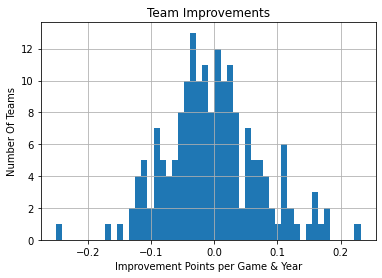

In [42]:
# Histogram of Team Imporvements
team_improvement.hist(bins=50)
plt.xlabel('Improvement Points per Game & Year')
plt.ylabel('Number Of Teams')
plt.title('Team Improvements')

Text(0.5, 1.0, 'The Most Improved Teams')

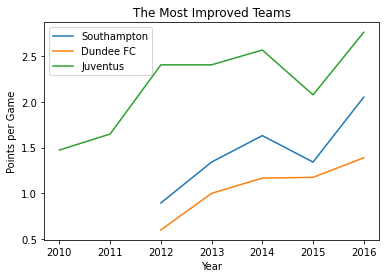

In [43]:
# Visualization Plot of the Points Per Game vs. Year for the most improved teams
x1=team_data.query('team_long_name=="Southampton"')['year']
y1=team_data.query('team_long_name=="Southampton"')['points_per_game']
x2=team_data.query('team_long_name=="Dundee FC"')['year']
y2=team_data.query('team_long_name=="Dundee FC"')['points_per_game']
x3=team_data.query('team_long_name=="Juventus"')['year']
y3=team_data.query('team_long_name=="Juventus"')['points_per_game']
plt.plot(x1,y1, label='Southampton')
plt.plot(x2,y2, label="Dundee FC")
plt.plot(x3,y3, label="Juventus")
plt.legend()
plt.xlabel('Year')
plt.ylabel('Points per Game')
plt.title("The Most Improved Teams")

### Question #2: Which Player has the most penalties?

In [44]:
# Sorting Values by Penalties Column
df_penalties=df_player_data.sort_values(by=['penalties'], ascending=False)

(90.0, 100.0)

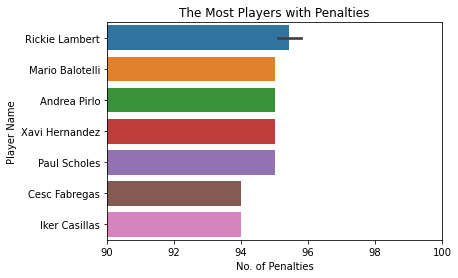

In [45]:
### Display Players with Most Penalties
sns.barplot(y="player_name", x="penalties", data=df_penalties[:25])
plt.xlabel('No. of Penalties')
plt.ylabel('Player Name')
plt.title("The Most Players with Penalties");
plt.xlim(90,100)

### Question #3: Which Team Attributes Lead To Most Victories?

In [46]:
# Create Year Column in Team Attributes Table
df_team_attributes['year']=pd.to_datetime(df_team_attributes['date']).dt.year

In [47]:
# Merge team_data and Team Attributes on team_api_id & Year
team_data=pd.merge(team_data, df_team_attributes, on=['team_api_id', 'year'])

In [48]:
# View Data Information
team_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 980
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   team_api_id                     981 non-null    int64  
 1   year                            981 non-null    int64  
 2   total_goals                     981 non-null    int64  
 3   num_of_games                    981 non-null    int64  
 4   total_points                    981 non-null    int32  
 5   points_per_game                 981 non-null    float64
 6   team_long_name                  981 non-null    object 
 7   num_years                       981 non-null    int64  
 8   id                              981 non-null    int64  
 9   team_fifa_api_id                981 non-null    int64  
 10  date                            981 non-null    object 
 11  buildUpPlaySpeed                981 non-null    int64  
 12  buildUpPlaySpeedClass           981 

In [49]:
# Create Dataframe for Quantitative Attributes Only as Categorical Attributes are measured by the Quantitative Ones so no need to compare them.
df_quant_attributes=team_data[['team_api_id', 'team_long_name', 'year', 'points_per_game','buildUpPlaySpeed','buildUpPlayPassing','chanceCreationPassing','chanceCreationCrossing','chanceCreationShooting','defencePressure','defenceAggression','defenceTeamWidth']]

In [50]:
# Calculate the Correlation between Quantitative Attributes & Points Per Game.
df_quant_attributes.corr()

,team_api_id,year,points_per_game,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
team_api_id,1.000000,-0.007839,0.046772,0.052132,-0.003022,-0.042379,0.063503,-0.085082,-0.053151,0.014088,-0.058302
year,-0.007839,1.000000,-0.021977,0.074948,0.048514,0.024844,-0.021954,-0.333363,-0.099163,-0.080795,-0.042233
points_per_game,0.046772,-0.021977,1.000000,-0.008219,-0.159268,0.067678,0.065759,0.109798,0.219724,0.116018,0.089346
buildUpPlaySpeed,0.052132,0.074948,-0.008219,1.000000,0.395065,0.289608,0.162214,0.087372,0.007574,0.131372,0.073289
buildUpPlayPassing,-0.003022,0.048514,-0.159268,0.395065,1.000000,0.163973,0.202657,-0.062444,-0.107224,0.083848,0.039079
chanceCreationPassing,-0.042379,0.024844,0.067678,0.289608,0.163973,1.000000,0.204306,0.154151,0.154627,0.122657,0.109145
chanceCreationCrossing,0.063503,-0.021954,0.065759,0.162214,0.202657,0.204306,1.000000,-0.017948,0.027785,0.065589,0.096794
chanceCreationShooting,-0.085082,-0.333363,0.109798,0.087372,-0.062444,0.154151,-0.017948,1.000000,0.190772,0.116604,0.132674
defencePressure,-0.053151,-0.099163,0.219724,0.007574,-0.107224,0.154627,0.027785,0.190772,1.000000,0.428100,0.481688
defenceAggression,0.014088,-0.080795,0.116018,0.131372,0.083848,0.122657,0.065589,0.116604,0.428100,1.000000,0.227369


In [51]:
# Calculate Kendall's Correlation between Points Per Game & Defence Pressure
stats.kendalltau(df_quant_attributes.points_per_game, df_quant_attributes.defencePressure)

KendalltauResult(correlation=0.15005995710489908, pvalue=4.937946066366516e-12)

In [52]:
# Calculate Kendall's Correlation between Points Per Game & Defence Aggression
stats.kendalltau(df_quant_attributes.points_per_game, df_quant_attributes.defenceAggression)

KendalltauResult(correlation=0.0866239335394611, pvalue=6.884038050047742e-05)

In [53]:
# Calculate Kendall's Correlation between Points Per Game & Chance Creation Shooting
stats.kendalltau(df_quant_attributes.points_per_game, df_quant_attributes.chanceCreationShooting)

KendalltauResult(correlation=0.08365112443822294, pvalue=0.00011972927346990764)

##### Top 3 Team Attributes that are best positively correlated with Points Per Game (P Value = 0):
1. Defence Pressure
2. Defence Aggression 
3. Chance Creation Shooting

In [54]:
# Close Connection TO SQLite Database
conn.close()

<a id='conclusions'></a>
## Conclusions

### Limitations
> (1) Missing Data (E.x: BuildUpDribbling Column has NaN values over 66% of its data) \
> (2) Insufficient Data for better calculation results

### Final Answers 
#### (1) Which Team Improved The Most Over The Years?   
   > Southampton Team
#### (2) Which Player has The Most Penalties?
   > Rickie Lambert
#### (3) Which Team Attributes Lead To Most Victories?
   > 1. Defence Pressure
   > 2. Defence Aggression
   > 3. Chance Creation Shooting

## Acknowledgements
>- Udacity's Data Analysis Nanodegree Program
>- Python & Pandas Documentation
>- StackOverFlow Website